# ДЗ 1, часть 1. Метод максимального правдоподобия

Имя, Фамилия: *Сальников Игнат*

группа: *221*

**Оценка(для проверяющего):** 0 из 10

**Дедлайн:** одновременно с частью 3

In [1]:
#all imports here please
import pickle as pkl

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go

import pandas as pd

## Задача 1. Свойства ММП оценок для модели нормального распределения (2 балла)

Рассмотрим следующую модель из независимых векторных наблюдений $X_1,..,X_n$:

$$X_i \overset{iid}{\sim} \mathcal{N}(\mu, \Sigma).$$

Постройте и исследуйте оценку для вектора матожиданий $\mu$ и ковариационной матрицы $\Sigma$ методом максимального правдоподобия.

**В помощь:** Если дифференцировать функцию $f: \mathbb{R}^{m \times n} \to \mathbb{R}$ по ячейкам входной матрицы, то получится матрица из производных, обозначаемая $\nabla_A f(A)$. Условие первого порядка для оптимизации записывается так же, как и в привычных вам случаях, нужно приравнять производные к нулю. Можете использовать [таблицу](https://en.wikipedia.org/wiki/Matrix_calculus#Scalar-by-matrix_identities) для получения оценок.

### Правдоподобие

*Запишите функцию правдоподобия и ее логарифм.*

$$f(x) = \frac{1}{\sqrt{(2\pi)^k |\Sigma|}} e^{-\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu)}$$


$$L(\mu, \Sigma) = \prod_{x = 1}^{n} f(x_i) = \left((2\pi)^k |\Sigma|\right)^{-\frac{n}{2}} \text{exp}\left( -\frac{1}{2} \sum_{x = 1}^{n} (x_i - \mu)^T \Sigma^{-1} (x_i - \mu)\right)$$

$$
\ell(\mu, \Sigma) = \log{L(\mu, \Sigma)} = -\frac{n}{2} \left(k \log(2\pi) + \log(|\Sigma|)\right) - \frac{1}{2} \sum_{x = 1}^{n} (x_i - \mu)^T \Sigma^{-1} (x_i - \mu)
$$

### ММП-оценка

*Найдите выражение для ММП-оценки и сравните решение с решением в одномерном случае.*

### 1 
Посчитаем сразу:

$$d \left(x^T A x\right)[h] = \left \langle x^TA + x^TA^T, h\right \rangle$$ 

По правилу сложной функции:

$$d \left((x - \mu)^T A (x - \mu)\right)[h] = \left \langle (x - \mu)^TA + (x - \mu)^TA^T, d(x - \mu)[h] \right \rangle = \left \langle - (x - \mu)^TA - (x - \mu)^TA^T, h \right \rangle$$ 

тогда

$$\frac{\partial}{\partial \mu} \left((x - \mu)^T \Sigma^{-1} (x - \mu)\right) = -\left(\Sigma^{-1}(x - \mu) + \Sigma^{-T}(x - \mu)\right) = - 2 \Sigma^{-1}(x - \mu)$$ 

так как ковариационная матрица симметрична

значит 

$$
\frac{\partial \ell}{\partial \mu} = \sum_{i = 1}^{n} \Sigma^{-1}(x_i - \mu)
$$

и ценкой MLE является:

$$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$


### 2
Матричные производные считать я устал, так что будем считать на бумажке или смотреть в таблице

$$\frac{\partial \ell}{\partial \mu} = -\frac{n}{2} \Sigma^{-T} + \frac{1}{2} \sum_{i = 1}^{n} \Sigma^{-T}(x_i - \mu)(x_i - \mu)^T\Sigma^{-T}$$

и ценкой MLE является:

$$
\hat{\Sigma} = \frac{1}{n} \sum_{i = 1}^{n} (x_i - \mu)(x_i - \mu)^T
$$

В одномерном случае то же самое (только одномерное лол) и мы получаем выборочное среднее и выборочную дисперсию.

## Задача 2. Свойства ММП оценок для модели равномерного распределения (2 балла)

Рассмотрим модель выборки $X_1,..,X_n$ из наблюдений

$X_i \overset{iid}{\sim} U[0,a]$

### Правдоподобие

*Запишите функцию правдоподобия и ее логарифм.*


$$
L(a) = \prod_{i=1}^{n} f(x_i) = a^{-n}, \quad \text{при условии } 0 \leq x_i \leq a, \quad \text{иначе } 0
$$

$$
\ell(a) = -n \log(a), \quad \text{при ограничениях выше }
$$

### ММП-оценка параметра $a$

*Найдите выражение для ММП-оценки параметра $a$*.

Заметим, что при заданных ограничениях функция максимизируется в точке:

$$
\hat{a} = \max_{i=1,\ldots,n} x_i
$$

## Задача 3. Оцениваем модель охлаждения (3 балла)

[(Другой) закон Ньютона](https://en.wikipedia.org/wiki/Newton%27s_law_of_cooling)  -- простая математическая модель охлаждения (или нагревания) тела

$$
\frac{dT}{dt} = r (T_{env} - T(t)),
$$

это дифференциальное уравнение первого порядка, которое в непрерывном (то есть, в любой момент $t$) показывает, какая должна быть температура у тела, если дана начальная температура $T(0)=T_0$. Температурные единицы измерения -- Кельвины, $r$ -- это некоторая константа, зависящая от самого тела, от состава среды и т.п. . Это приближённый закон.

Вообще константа $r$ неизвестна априори и если мы хотим делать какое-то устройство, которое использует такую модель, мы должны как-то оценить $r$. Один из вариантов -- померить температуру среды (полагаем её константной), нагреть тело до какой-то температуры $T_0$, а потом оставить остывать и замерять через разные промежутки времени его температуру. По итогам таких наблюдений получится датасет
$$
T_{t_0},T_{t_1},..,T_{t_n}, ~~ t_0=0.
$$

Осталось придумать вероятностную модель. Например, мы можем записать приближённое дискретизированное по времени уравнение, используя метод Эйлера:

$$
T_{t_{i+1}} = T_{t_{i}} + r (T_{env} - T_{t_{i}}) \Delta t_i, ~~  \Delta t_i = t_{i+1} - t_i,
$$

а дальше предлагать разные варианты оценивания.

### Правдоподобие

С учётом ошибок измерений и необъяснимых факторов среды, договорившись измерять температуру через равные промежутки времени $\Delta t_i= \Delta t$, можно предположить модель, очень похожую на модель авторегрессии $AR(1)$:

$$
T_{i+1} = (1 - r\Delta t)T_{i} + r T_{env} \Delta t + \varepsilon_{i+1}, ~~ \varepsilon_{i+1} \sim_{iid} N(0,\sigma^2).
$$

1. Предполагая $T_{env}$ и $\Delta t$ данными, определите параметры модели, которые нужно оценивать и выведите функцию лог-правдоподобия.

2. Выведите оценки ММП для данной модели.

 Хотим оценить:
- $r$ — некоторая константа,
- $\sigma^2$ — дисперсия ошибок измерений.

По формуле полной вероятности распишем совместную плотность как: 

$$ f(T_{n}, T_{n - 1}, \dots, T_0) = f(T_{n} | T_{n - 1}, \dots, T_0) f(T_{n - 1}, \dots, T_0) = \dots = f(T_{n} | T_{n - 1}, \dots, T_0) \dots f(T_1 | T_0) f(T_0)$$

Поскольку $T_0$ является константой (мы нагреваем до известной фиксированной температуры), мы можем зписать 

$$ L(r, \sigma^2) = f(T_{n}, T_{n - 1}, \dots, T_0) = \prod_{i = 1}^{n} f(T_i | T_{i - 1}, \dots, T_0)$$


Зная распределение случайной величины

$$\varepsilon_{i+1} = T_{i+1} - (1 - r\Delta t)T_{i} - r T_{env} \Delta t$$

можем записать функцию правдоподобия, которая будет равна:

$$L(r, \sigma^2) = \prod_{i = 1}^{n} \frac{1}{\sqrt{2\pi \sigma^2}} \text{exp}\left( - \frac{1}{2\sigma^2} \left(T_i - (1 - r\Delta t)T_{i - 1} - r T_{env} \Delta t \right)^2 \right)$$

Логарифм функции правдоподобия:

$$
\ell (r, \sigma^2)  = const -\frac{n}{2} \log(\sigma^2) - \frac{1}{2 \sigma^2} \sum_{i=1}^{n} \left( T_{i} - (1 - r \Delta t) T_{i - 1} - r T_{env} \Delta t \right)^2
$$

Оптимизируя по $\sigma^2$ получаем:

$$
\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} \left( T_{i} - (1 - r \Delta t) T_{i - 1} - r T_{env} \Delta t \right)^2
$$

Оптимизируем по $r$:

$$
\frac{\partial \ell}{\partial r} \propto \sum_{i=1}^{n} \left( T_{i} -  T_{i - 1} + r \left( \Delta t T_{i - 1} -  T_{env} \Delta t  \right)\right) \left( \Delta t T_{i - 1} -  T_{env} \Delta t  \right)
$$

$$
\hat{r} = \frac{\sum_{i=1}^{n} \left( T_{i - 1} -  T_{i} \right) \left( \Delta t T_{i - 1} -  T_{env} \Delta t  \right)}{\sum_{i=1}^{n}  \left( \Delta t T_{i - 1} -  T_{env} \Delta t  \right)^2}
$$


### Пишем модель

Имплементируйте класс модели, используя шаблон ниже и проведите некоторые тесты, чтобы убедиться, что он рабочий.

In [2]:
from scipy.optimize import minimize

class CoolingModel:
    
    def __init__(self, r, delta, sigma2):
        self.r = r
        self.sigma2 = sigma2
        self.delta = delta
        
    def step(self,T0,Tenv):
        """Makes one step in time

        Args:
            T0 (float[]): current temperature (NTraj,)
            Tenv (float[]): current environment temperature (NTraj,)
        Returns:
            T (float[]): next temperature (NTraj,)
        """        
        
        T1 = (1 -  self.r * self.delta) * T0 + self.r * Tenv * self.delta + \
            np.random.normal(0, np.sqrt(self.sigma2))
        
        return T1
    
    def simulate(self, T0, NSteps, Tenv):
        """Simulates NTraj trajectories of cooling process

        Args:
            T0 (float[]): initial temperature (NTraj,)
            NSteps (int): number of time steps
            Tenv (float): environment temperature
        Returns:
            trajs (float[]): simulation result (NTraj,NSteps)
        """        
        trajs = np.zeros([T0.shape[0],NSteps+1])
        
        trajs[:,0] = T0
        
        for temps in trajs:
            for t in range(1, NSteps+1):
                temps[t] = self.step(temps[t - 1], Tenv)
            
        return trajs       

    def fit_numerical_solution(self, temps, Tenv):
        """Fits the model using the given data

        Args:
            temps (float[]): temperatures (N,)
            Tenv (float): environment temperature
        """ 
        
   
        def log_likelihood(params, T, Tenv):
            r, sigma2 = params
            n = len(T)

            if sigma2 <= 0:
                return 10e10

            sum_term = np.sum((T[1:] - (1 - r * self.delta) * T[:-1] - r * Tenv * self.delta) ** 2)

            minus_val = n * np.log(2 * np.pi * sigma2) + 1 / sigma2 * sum_term

            return minus_val

        result = minimize(log_likelihood, x0=(self.r, self.sigma2), args=(temps, Tenv))

        self.r, self.sigma2 = result.x
        
    def fit(self, temps, Tenv):
        """Fits the model using the given data

        Args:
            temps (float[]): temperatures (N,)
            Tenv (float): environment temperature
        """ 
        
        n = len(temps)
        
        star = (self.delta * temps[:-1] - Tenv * self.delta)        
        self.r = np.sum((temps[:-1] - temps[1:]) * star) / np.sum(star**2)
        
        self.sigma2 = np.sum((temps[1:] - (1 - self.r * self.delta) * temps[:-1] - \
                                self.r * Tenv * self.delta) ** 2) / n


Попробуйте для нарисовать несколько возможных траекторий, код ниже должен показать график.

In [3]:
#params
r = 0.2 #1/sec
sigma2=0.02

#time stuff
NSteps = 1000
finalTime = 100
delta=finalTime/NSteps #sec

#number of simulations
NTrajs = 5

#temperatures
T0 = np.ones([NTrajs])*280 #K
Tenv = 300 #K

procModel = CoolingModel(r, delta, sigma2)
trajs = procModel.simulate(T0, NSteps, Tenv)

Не нравятся мне ваши графики, хочу plotly

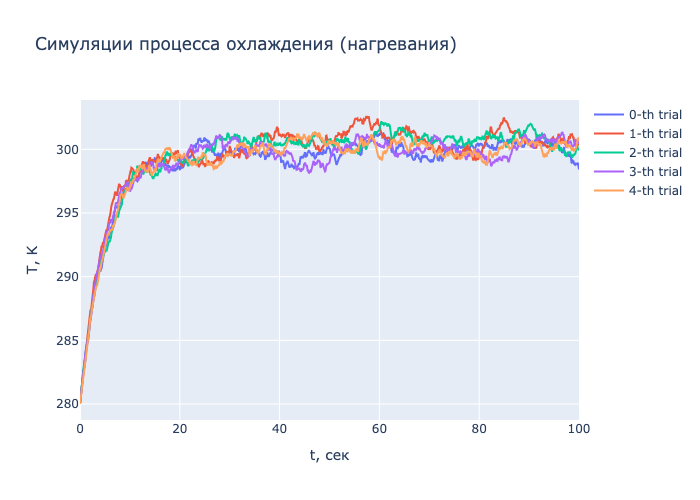

In [4]:
ts = np.arange(0,finalTime+delta/2,delta) #+delta/2 to include the last value

fig = go.Figure(
    data=[go.Scatter(x=ts, y=trajs[i, :], mode='lines', name=f'{i}-th trial') for i in range(NTrajs)]
)

fig.update_layout(
    title='Симуляции процесса охлаждения (нагревания)',
    xaxis_title='t, сек',
    yaxis_title='T, K',
)

fig.show(renderer='png')

За равное время сходится к нужной температуре, а дальше разница набрюдаются лишь погрешности измерений этой температуры 

### Оценка модели по данным

Допишите метод `fit` в класс модели и оцените параметры, используя данный датасет, с помощью метода максимального правдоподобия. Данные в формате ``pkl``, загружаются как словарь.

In [5]:
with open("./coolingModel.pkl","rb") as f:
    dd = pkl.load(f)

data = pd.DataFrame(dd)
data

,time,temperature,Tenv,delta
0,0.0000,320.000000,260,0.0125
1,0.0125,320.056284,260,0.0125
2,0.0250,320.090165,260,0.0125
3,0.0375,320.100113,260,0.0125
4,0.0500,320.203797,260,0.0125
...,...,...,...,...
1196,14.9500,296.084730,260,0.0125
1197,14.9625,296.035463,260,0.0125
1198,14.9750,295.975537,260,0.0125
1199,14.9875,296.054655,260,0.0125


### Сразу потренеруемся искать оптимум численно.

In [6]:
delta = 0.0125

procModel = CoolingModel(np.random.uniform(0.1, 0.9), delta, np.random.uniform(0.1, 0.9))
procModel.fit_numerical_solution(data['temperature'].to_numpy(), 260)
print(f"Parameters:  r={procModel.r},sigma^2={procModel.sigma2}")

Parameters:  r=0.03608791481219361,sigma^2=0.015206088003038703


### Честное решение

In [7]:
delta = 0.0125

procModel = CoolingModel(0.1, delta, 0.1)
procModel.fit(data['temperature'].to_numpy(), 260)
print(f"Parameters:  r={procModel.r},sigma^2={procModel.sigma2}")

Parameters:  r=0.03608793300832803,sigma^2=0.015206095468088206


Круто, и зачем только люди вообще руками оптимизируют (да-да, плохие градиенты и невыпуклость, вопрос был риторическим)

Нарисуйте несколько траекторий оценённой модели более тонкими и прозрачными линиями и сравните с вашими данными.

In [8]:
n_trials = 10
T0 = np.ones(n_trials) * 320

procModel_2 = CoolingModel(procModel.r, delta, procModel.sigma2)

trials_log = procModel_2.simulate(T0, NSteps=12000, Tenv=260)
trials_data = pd.DataFrame(trials_log.T)

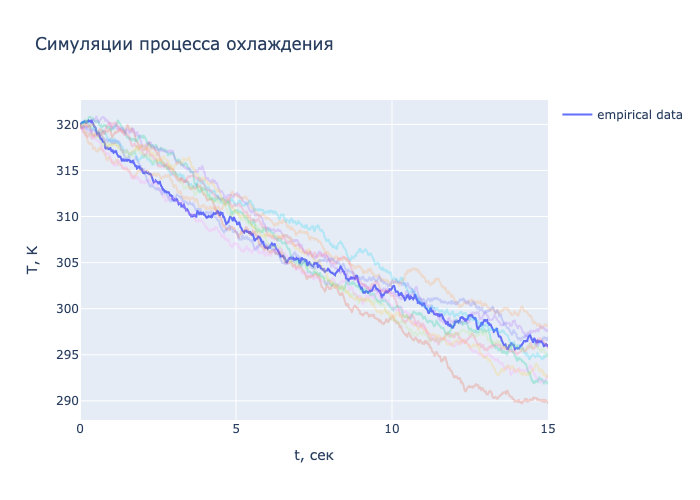

In [9]:
fig = go.Figure(
    data=[go.Scatter(x=data['time'], y=data['temperature'], mode='lines', name='empirical data')]
)

for i in range(n_trials):
    fig.add_trace(go.Scatter(x=data['time'], y=trials_data[i], mode='lines', showlegend=False, opacity=0.25))
    
fig.update_layout(
    title='Симуляции процесса охлаждения',
    xaxis_title='t, сек',
    yaxis_title='T, K',
)

fig.show(renderer='png')

Ну вроде неплохо, наши предсказания адекватно отражают реальность

## Задача 4. Дискретная модель цен (3 балла)

### Броуновское движение

[Броуновское движение (или по-другому Винеровский процесс)](https://en.wikipedia.org/wiki/Wiener_process)  - это случайный процесс (набор случайных величин) $\{W_t\}_{t \geq 0}$ c непрерывным временем, который задётся так:

* $W_0 = 0$

* $W_t - W_s \sim \mathcal{N}(0, t-s)$, $0 \leq s \leq t$

* $W_{t_2} - W_{t_1}$ и $W_{t_4} - W_{t_3}$  независимы для $0 \leq t_1 \leq t_2 \leq t_3 \leq t_4$

Мы можем попытаться нарисовать значения процесса в любом конечном наборе точек $(t_i)_{i=0}^{N_t}$, это будут зависимые случайные величины. Удобнее всего для симуляции пользоваться последним свойством: если обозначить $\Delta t_i = t_{i+1} - t_i$, то

$$
W_{t_{i+1}} = W_{t_i} + \varepsilon_{i+1},
$$

где $W_{t_0}$ задано, а шумы $\varepsilon_{i+1} \sim N(0, \Delta t_i)$ независимы.

### Симуляция

*Реализуйте симуляцию этого дискретизированного процесса $(W_{t_i})_{i=0}^{N_t}$, используя данную сетку по времени $(t_i)_{i=0}^{N_t}$.*

In [10]:
class BrownianMotion:

    def __init__(self):
        pass

    def sample(self, ts, Ntraj):
        """Returns a discrete set of observations

        Args:
            ts (float[]): time grid (T,)
            Ntraj (int): number of trajectories to sample
        Returns
            trajs (float[]): (Ntraj,T) samples
        """
        
        n = len(ts)
        
        trajs = np.zeros([Ntraj,n])
                
        for i in range(Ntraj):
            for j in range(1, n):
                delta_t = ts[j] - ts[j - 1]

                eps = np.random.normal(0, np.sqrt(delta_t))
                
                trajs[i, j] = trajs[i, j - 1] + eps

        return trajs

Проверим! Нарисуйте набор семплов наблюдений $W_{t_0},..,W_{t_{N_{t}}}$ из модели Броуновского движения при $t_0=0$ и $W_{t_0} = 0$.

In [11]:
#example
Ntraj = 50
T=3
Nt = 100 #number of time subdivisions
delta = T/Nt
ts = np.arange(0,T+delta/2 ,delta) # discrete points from [0,T] 

bmProc = BrownianMotion()
trajs = bmProc.sample(ts,Ntraj)

Хочу плотли!

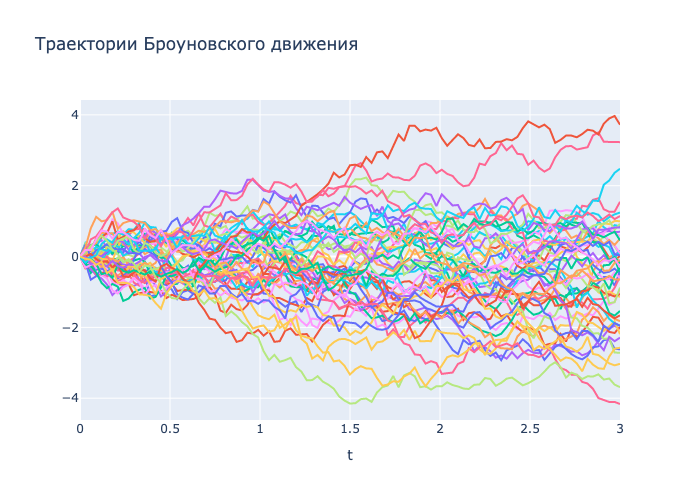

In [12]:
fig = go.Figure()

for i in range(trajs.shape[0]):
    fig.add_trace(go.Scatter(x=ts, y=trajs[i]))

fig.update_layout(
    title="Траектории Броуновского движения",
    xaxis_title="t",
    showlegend=False
)

fig.show(renderer='png')

## Геометрическое Броуновское движение

Геометрическое Броуновское движение (GBM) -- это модель

$$
S_t = S_0 \exp[(\mu - \frac{\sigma^2}{2})t + \sigma W_t],
$$

где параметр $\mu$ называется сносом (он связан с безрисковой процентной ставкой на рынке и выплатами по активу, например, дивидендами акции), а $\sigma$ -- волатильностью. Это один из базовых кирпичиков моделей финансовых рядов.

Пусть мы пронаблюдали набор значений $S_{t_1},..,S_{t_N}$, давайте получим оценки параметров и попробуем оценить их по данным.


### Параметры

*Определите, какие параметры модели вы будете оценивать.*

$\mu$, $\sigma^2$

### Правдоподобие

*Запишите функцию правдоподобия для модели данных и ее логарифм.*

$$
S_t = S_0 \exp[(\mu - \frac{\sigma^2}{2})t + \sigma W_t]
$$

$$
\sigma W_t = \ln S_t - \ln S_0  - (\mu - \dfrac{\sigma^2}{2})t
$$

$$
\sigma \Delta W_{t_i} = \Delta \ln S_{t_i} - (\mu - \dfrac{\sigma^2}{2})\Delta t_i - \ln S_{t_{i - 1}}
$$

$$
\Delta \ln S_t = \sigma \Delta W_t + (\mu - \dfrac{\sigma^2}{2})\Delta t, \quad \Delta W_t \sim N(0, \Delta t)
$$

можем записать функцию правдоподобия, которая будет равна:

$$L(\mu, \sigma) = \prod_{i = 1}^{n} \frac{1}{\sqrt{2\pi \sigma^2 \Delta t_i}} \text{exp}\left[ - \frac{1}{2\sigma^2 \Delta t_i} \left(\Delta \ln S_t  - (\mu - \frac{\sigma^2}{2})\Delta t_i \right)^2 \right]$$

Тут и дальше под $S_t$ всегда подразумевается $S_{t_i}$

Логарифм функции правдоподобия:

$$
\ell (\mu, \sigma)  = const - \frac{n}{2} \log(\sigma^2) + \sum_{i=1}^{n} - \frac{1}{2 \sigma^2 \Delta t_i} \left(\Delta \ln S_t  - (\mu - \frac{\sigma^2}{2})\Delta t_i \right)^2
$$

### ММП-оценки

*Найдите выражение для ММП-оценок параметров.*

Оптимизирую по $\mu$ получаем:

$$
\frac{\partial \ell}{\partial \mu} \propto \sum_{i=1}^{n} \Delta \ln S_t  - (\mu - \frac{\sigma^2}{2})\Delta t_i 
$$

$$
\hat{\mu} = \dfrac{\sum_{i=1}^{n} \Delta \ln S_t + \dfrac{\sigma^2}{2} \Delta t_i}{\sum_{i=1}^{n} \Delta t_i}
$$

$$
\hat{\mu} = \dfrac{ \Delta \ln S}{\Delta t} + \dfrac{\sigma^2}{2} 
$$

Оптимизируя по $\sigma^2$ получаем:

$$
\frac{\partial \ell}{\partial \sigma} = \dfrac{n}{\sigma} + 
\sum_{i=1}^n \dfrac{2 \left(\Delta \ln S_t  - (\mu - \frac{\sigma^2}{2})\Delta t_i \right) \Delta t_i \sigma \cdot 2 \sigma^2 \Delta t_i - 4 \sigma \Delta t_i \cdot \left(\Delta \ln S_t  - (\mu - \frac{\sigma^2}{2})\Delta t_i \right)^2}
{4 \sigma^4 (\Delta t_i)^2}
$$

$$
\frac{\Delta t}{4} \sigma^4 + n \sigma^2 - \sum_{i=1}^n \frac{(\Delta \ln S_i)^2}{\Delta t_i} + 2 \Delta \ln S \mu - \Delta t \mu^2 = 0
$$

$$
\hat{\sigma}^2 = \dfrac{-n + \sqrt{n^2 - \Delta t \left( - \sum_{i=1}^n \frac{(\Delta \ln S_i)^2}{\Delta t_i} + 2 \Delta \ln S \mu - \Delta t \mu^2 \right)}}{\Delta t / 2}
$$


Но что делать если мы не знаем оба? Подствляем одну оценку в другую и находим

$$
\hat{\mu} = \dfrac{ \Delta \ln S}{\Delta t} + \dfrac{\hat{\sigma}^2}{2}
$$

$$
\hat{\sigma}^2 = \dfrac{-n + \sqrt{n^2 - \Delta t \left( - \sum_{i=1}^n \dfrac{(\Delta \ln S_i)^2}{\Delta t_i} + 2 \Delta \ln S \hat{\mu} - \Delta t \hat{\mu}^2 \right)}}{\Delta t / 2}
$$

$$
\hat{\sigma}^2 = \dfrac{-n + \sqrt{n^2 - \Delta t \left( - \sum_{i=1}^n \dfrac{(\Delta \ln S_i)^2}{\Delta t_i} + 2  \dfrac{ (\Delta \ln S)^2}{\Delta t} + \Delta \ln S \hat{\sigma}^2  -  \left(\dfrac{ (\Delta \ln S)^2}{\Delta t} + \Delta \ln S \hat{\sigma}^2 +   \dfrac{\Delta t \hat{\sigma}^4}{4} \right) \right)}}{\Delta t / 2}
$$

$$
\hat{\sigma}^2 = \dfrac{-n + \sqrt{n^2 + \Delta t \sum_{i=1}^n \frac{(\Delta \ln S_i)^2}{\Delta t_i} - (\Delta \ln S)^2  + \dfrac{(\Delta t)^2 \hat{\sigma}^4}{4}  }}{\Delta t / 2}
$$

$$
\dfrac{\hat{\sigma}^4 (\Delta t)^2 + 4n \hat{\sigma}^2 \Delta t + 4n^2}{4} = n^2 + \Delta t \sum_{i=1}^n \frac{(\Delta \ln S_i)^2}{\Delta t_i} - (\Delta \ln S)^2  + \dfrac{(\Delta t)^2 \hat{\sigma}^4}{4}
$$

И тогда

$$
\hat{\sigma}^2 = \dfrac{1}{n} \sum_{i=1}^n \frac{(\Delta \ln S_i)^2}{\Delta t_i} - \dfrac{(\Delta \ln S)^2 }{n \Delta t} 
$$

$$
\hat{\mu} = \dfrac{ \Delta \ln S}{\Delta t} + \dfrac{\hat{\sigma}^2}{2} 
$$

### Пишем модель

In [13]:
class GBM:

    def __init__(self,mu,sigma):
        self.mu = mu 
        self.sigma = sigma
        self.brownMotion = BrownianMotion() 

    def sample(self, x0, ts):
        """Returns a discrete set of observations

        Args:
            x0 (float[]): set of initial conditions x_{ts[0]}  (Ntraj,)
            ts (float[]): time grid (T,)
        Returns
            trajs (float[]): (Ntraj,T) samples
        """
                
        Ntraj = x0.shape[0]
        n = len(ts)
        
        bm_traj = self.brownMotion.sample(ts, Ntraj)

        trajs = np.zeros([Ntraj,n])
        trajs[:, 0] = x0
                        
        for i in range(Ntraj):
            for j in range(1, n):
                S0 = trajs[i, 0]

                trajs[i, j] = S0 * np.exp((self.mu - self.sigma**2 / 2) * ts[j] + self.sigma * bm_traj[i, j])
        
        return trajs

    def fit(self, st, delta):
        """Fits the parameters given the data (assuming the step size is constant and equal delta)

        Args:
            st (float[]): observations (T,)
            delta (flaot): time step size
        """
        
        n =len(st)
        
        DlogS = np.log(st[-1]) - np.log(st[0])
        Dt = delta * n
        
        sigma2 = - 1 / n * DlogS**2 / Dt + 1 / n * np.sum((np.log(st[1:]) - np.log(st[:-1]))**2 / delta)  
        
        mu = DlogS / Dt + sigma2 / 2
        
        self.mu = mu
        self.sigma = np.sqrt(sigma2)



Протестируем.

In [14]:
#example
Ntraj = 50
T=50
Nt = 5000#number of time subdivisions
delta = T/Nt
ts = np.arange(0,T+delta/2 ,delta)# discrete points from [0,T] 

mu=0.02
sigma=0.27
gbmProc = GBM(mu, sigma)

x0 = np.ones([Ntraj])*100
trajs = gbmProc.sample(x0,ts)

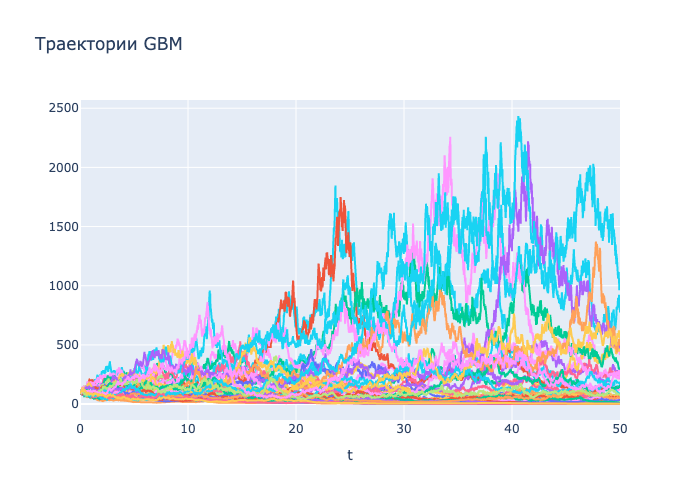

In [15]:
fig = go.Figure()

for i in range(trajs.shape[0]):
    fig.add_trace(go.Scatter(x=ts, y=trajs[i]))

fig.update_layout(
    title="Траектории GBM",
    xaxis_title="t",
    showlegend=False
)

fig.show(renderer='png')

### Оценка модели по данным

Допишите метод `fit` в класс модели и оцените параметры, используя данный датасет, с помощью метода максимального правдоподобия. Данные в формате ``pkl``, загружаются как словарь.

In [16]:
with open("./gbmData.pkl", "rb") as f:
    dd=pkl.load(f)

In [17]:
import pandas as pd

dd = pd.DataFrame(dd)
dd

,value,time
0,100.000000,0.00
1,98.287430,0.01
2,101.786402,0.02
3,100.001321,0.03
4,100.745049,0.04
...,...,...
4996,2583.320356,49.96
4997,2534.091296,49.97
4998,2541.548354,49.98
4999,2578.303277,49.99


In [18]:
#random init
gbmProc = GBM(0.01, 0.01)
gbmProc.fit(dd['value'].to_numpy(), 0.01)

print('mu_MLE', gbmProc.mu)
print('sigma_MLE', gbmProc.sigma) 

mu_MLE 0.08418229707051868
sigma_MLE 0.19544501744863355


Нарисуйте несколько траекторий оценённой модели более тонкими и прозрачными линиями и сравните с вашими данными.

In [19]:
#generating new trajectories
Ntraj = 10

x0 = 100 * np.ones(Ntraj)
ts = dd['time'].to_numpy()

trajs = gbmProc.sample(x0, ts)

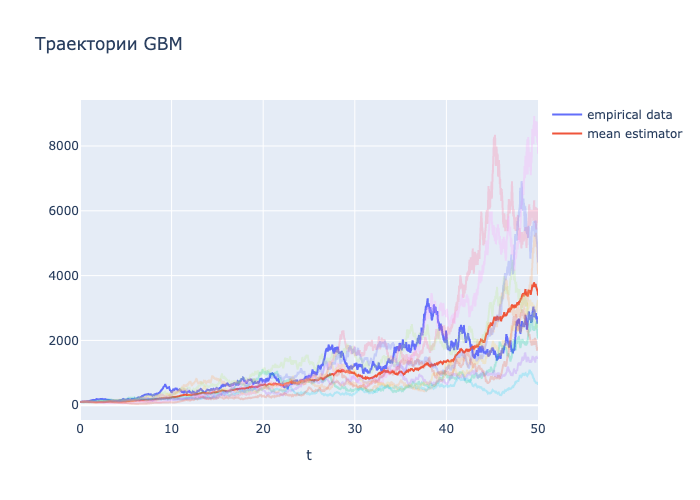

In [20]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=dd['time'], y=dd['value'], name=f'empirical data'))

fig.add_trace(go.Scatter(x=ts, y=np.mean(trajs, axis=0), name=f'mean estimator'))

for i in range(Ntraj):
    fig.add_trace(go.Scatter(x=ts, y=trajs[i], opacity=0.25, showlegend=False))

fig.update_layout(
    title="Траектории GBM",
    xaxis_title="t"
)

fig.show(renderer='png')

Вроде норм. Блин круто, правда идейно очень сильно на рынок акций похоже.